In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\lenovo\Desktop\Notebooks\DATA\cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 30)

## 1/ Standarize the data :

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled_x = scaler.fit_transform(df)

In [9]:
scaled_x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [10]:
scaled_x.mean()

-6.826538293184326e-17

## 2/Calculate the covariance matrix :

In [15]:
covariance_matrix = np.cov(scaled_x,rowvar=False)

In [16]:
covariance_matrix

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

## 3/Calculate the eigen components :

In [17]:
eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)

In [19]:
# eigen_vectors.shape

## 4/ PCA 30 feature_space ---->  30 PCA ----> Sort the eigen_vectors based on the magnitude(eigen_values)  ----> Choose the top 2

In [21]:
number_of_components = 2

In [25]:
sorted_key = np.argsort(eigen_values)[::-1][:number_of_components]

In [26]:
eigen_values , eigen_vectors = eigen_values[sorted_key] , eigen_vectors[:,sorted_key]

## 5/ Original_data ---> Project ---> Eigen_vectors

In [27]:
principal_components = np.dot(scaled_x,eigen_vectors)

In [28]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

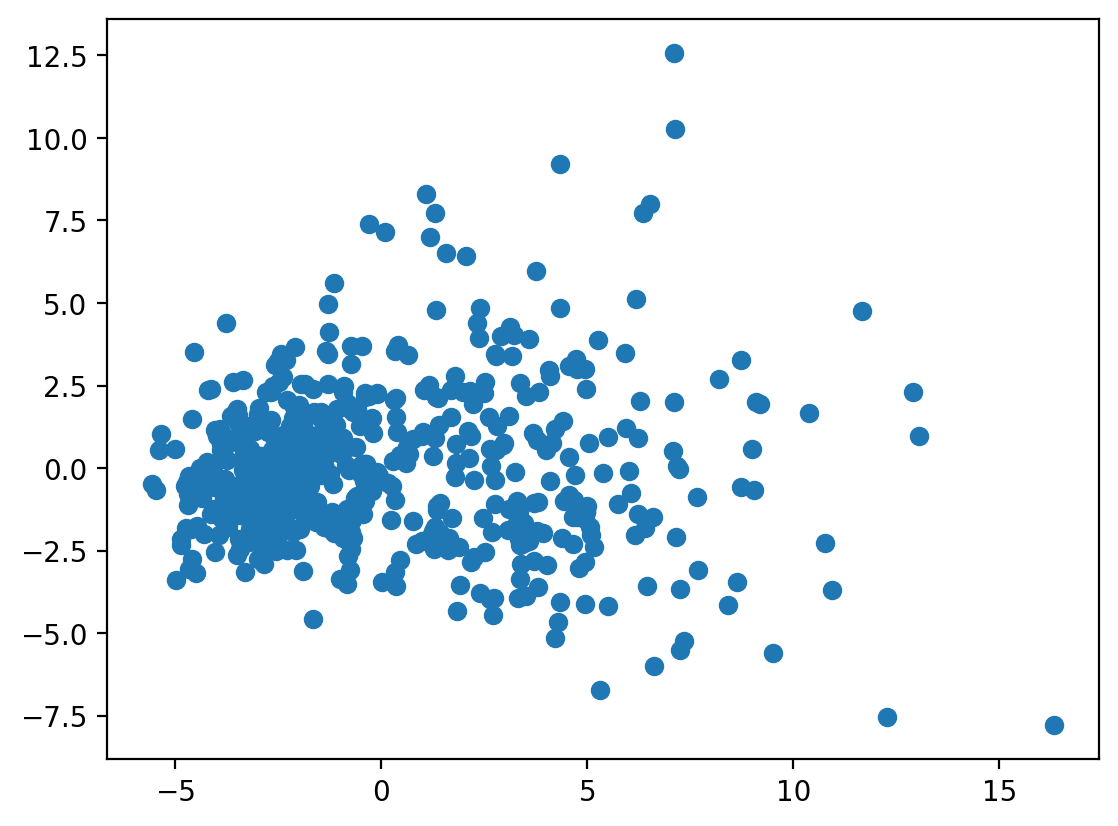

In [30]:
plt.figure(dpi=200)
plt.scatter(x=principal_components[:,0],y=principal_components[:,1])

In [31]:
from sklearn.datasets import load_breast_cancer

In [32]:
cancer_dictionary = load_breast_cancer()

In [35]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [40]:
cancer_dictionary['target']

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

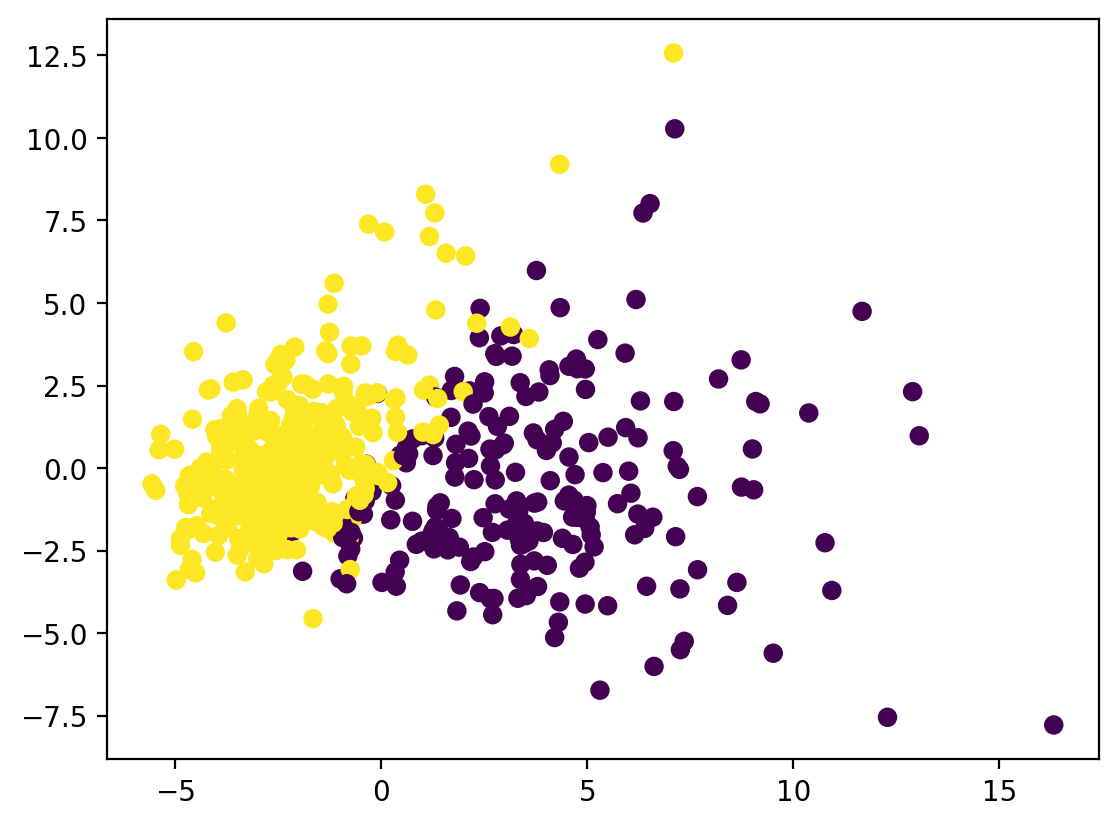

In [41]:
plt.figure(dpi=200)
plt.scatter(x=principal_components[:,0],y=principal_components[:,1],c = cancer_dictionary['target'])